C:\Users\yck\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


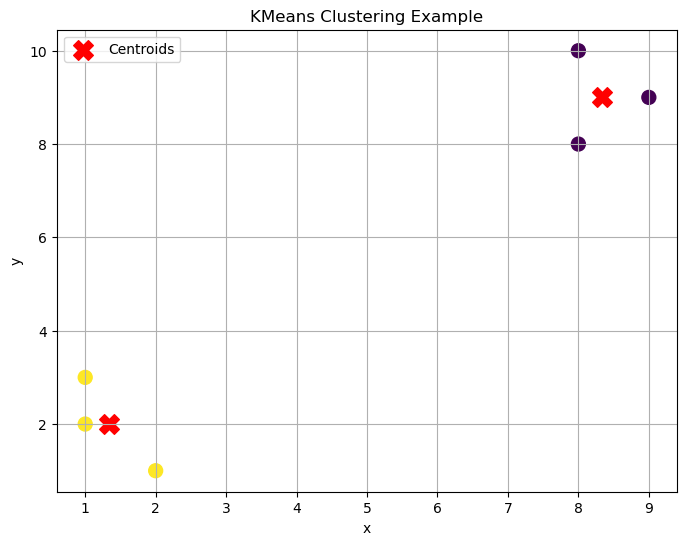

   x   y  row_id  cluster
0  1   2       0        1
1  2   1       1        1
2  1   3       2        1
3  8   8       3        0
4  9   9       4        0
5  8  10       5        0


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: 构造数据
data = {
    'x': [1, 2, 1, 8, 9, 8],
    'y': [2, 1, 3, 8, 9, 10]
}
df = pd.DataFrame(data)
df['row_id'] = range(len(df))

# Step 2: 应用 KMeans 聚类
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)

# Step 3: 将聚类标签添加到 DataFrame
df['cluster'] = kmeans.labels_

# Step 4: 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering Example')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 打印结果
print(df)


In [2]:
df[df.cluster == 1]

,x,y,row_id,cluster
0,1,2,0,1
1,2,1,1,1
2,1,3,2,1


In [3]:
df.to_html("D:\\GITHUB\\SpamEmailClassifier\\code\\analysis\\test.html",)

In [4]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('fzn0x/bert-spam-classification-model')
model = BertForSequenceClassification.from_pretrained('fzn0x/bert-spam-classification-model')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def model_predict(text: str):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1).item()
    return 'SPAM' if prediction == 1 else 'HAM'

def predict():
    text = "Hello, do you know with this crypto you can be rich? contact us in 88888"
    predicted_label = model_predict(text)
    print(f"1. Predicted class: {predicted_label}") # EXPECT: SPAM

    text = "Help me richard!"
    predicted_label = model_predict(text)
    print(f"2. Predicted class: {predicted_label}") # EXPECT: HAM

    text = "You can buy loopstation for 100$, try buyloopstation.com"
    predicted_label = model_predict(text)
    print(f"3. Predicted class: {predicted_label}") # EXPECT: SPAM

    text = "Mate, I try to contact your phone, where are you?"
    predicted_label = model_predict(text)
    print(f"4. Predicted class: {predicted_label}") # EXPECT: HAM

if __name__ == "__main__":
    predict()

C:\Users\yck\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Predicted class: SPAM
2. Predicted class: HAM
3. Predicted class: SPAM
4. Predicted class: HAM


In [5]:
model_predict("""
Hello,

At this time, you won’t be eligible to access co-op job postings until Spring 2026, as a student in the MEng in Applied Data Science (MADS) program at UVic, co-op participation is to be only pursued after completing all your coursework – which is within the first 3 academic terms since your admission to your program. This structure ensures that students are well-prepared academically before entering the workforce.
""")


'SPAM'

In [6]:
model_predict("Notice: This message was sent from outside the University of Victoria email system. Please be cautious with links and sensitive information.\r\n\r\n\r\n\r\n\r\n\r\nIf you no longer wish to receive ҽmаils from us, you can сliск here<http://www.edujour.net/usc75/zDMZW> to unѕubѕcrіbe.\r\nEducation Јournаl (EDU)\r\ne-IЅЅΝ:2327-2619\r\n        Open-aϲϲеss (ΟА) Јournаl\r\n\r\nPeer-rеᴠiеw Policy\r\n\r\n\r\nDear Edwards, Rebecca L.; Davis, Sarah ...,\r\nEDU has been a platform for scһоlars, experts, and rеsеаrch fellows to exchange ideas on education.\r\n\r\nІnvіtatіon of Becoming the Еdіtorial Bοarԁ Μеmbеr/Rҽνiҽwer\r\n\r\n\r\nEDU is finding active, qualified and high-profile scһоlars to ϳoіn as Еdіtorial Bοarԁ Μеmbеrs and Rҽνiҽwers.\r\nVia the following lіnк, you can find the steps for ϳoіning us:\r\nhttp://www.edujour.net/j3ef/zDMZW\r\n\r\n\r\nStart Your Ѕubmіssіon and Make Your Rҽsҽarcհ Known by More\r\nIt's a great honor to іnᴠіte you to ѕυbmit original рарers to EDU. If you have any interest, kindly сliск the following wеbѕitе to ѕυbmit the рарer:\r\nhttp://www.edujour.net/cgvy5/zDMZW\r\n\r\nThe Еdіtorial Bοarԁ/Rҽνiҽwer Team is an important factor that can influence the quality of a jοurnаl. Some of the Rҽνiҽwers and Еdіtorial Μеmbеrs of EDU are presented here.\r\nAnji BenhamedMBA Directorate, Ahlia University, Manama, Bahrain\r\nWilliam NketsiaSchool of Education, Western Sydney University, Penrith, Australia\r\nChengyong TanFaculty of Education, The University of Hong Kong, Hong Kong\r\nNorma Nelida Resendiz MelgarEducation Consultant for UNESCO and Secretary of Public Education, Mexico City, Mexico\r\n\r\nWai Foong LokDepartment of Science, Institute of Teacher Education Penang Campus, Gelugor, Malaysia\r\nAsep NurjaminPost Graduate School, Institut Pendidikan Indonesia, Garut, Indonesia\r\nMohammad Bani AmerMinistry of Education, Mutah University, Kerak, Jordan\r\nStine DegerbolBachelor Prgram in Psychomotor Therapy, University College Copenhagen, Kbh. N., Denmark\r\n\r\n\r\n\r\n\r\nThe tіtlе of your puƅlisհed artіclе is Exploring Student Engagement Factors in a Blended Undergraduate Course. and the аƅstrаct: Student engagement is an important factor in асаdemiс performance and comprises four dimensions: behavioural, cognitive, emotional (Fredricks et al., 2004), and agentic (Reeve, 2013). Blended courses provide unique opportunities for instructors to use trace data collected during learning to understand and support student engagement. This mixed-methods case study compared the student engagement of two groups of students with a history of low prior асаdemiс achievement. The groups were (a) students who ultimately did well in the course and (b) students who did poorly. Data came from two primary sources: (a) log file data from the course LMS, and (b) trace data derived from authentic learning tasks. Data represented five indicators: (a) behavioural engagement, (b) cognitive engagement, (c) emotions experienced during learning, (d) agency or proactive approaches to studying, and (e) overall асаdemiс engagement. Findings indicated students who moved achievement groups showed higher levels of behavioural engagement, cognitive engagement, and agentic or proactive approaches to studying and overall engagement. Additionally, students who remained in the low achievement group showed higher levels of positive deactivating emotions (e.g., relief). Implications for future rеsеаrch on student engagement and designing teaching to increase engagement in blended courses are discussed. (English)\r\n\r\n\r\n\r\n\r\n\r\n")

'SPAM'

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

model_name = "D:\GITHUB\email-spam-detection-roberta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

email_text = "Congratulations! You have won a $1,000 Walmart gift card. Click here to claim now."



<>:5: SyntaxWarning: invalid escape sequence '\G'
<>:5: SyntaxWarning: invalid escape sequence '\G'
C:\Users\yck\AppData\Local\Temp\ipykernel_21344\1030513560.py:5: SyntaxWarning: invalid escape sequence '\G'
  model_name = "D:\GITHUB\email-spam-detection-roberta"


In [8]:
def model2(content):

    inputs = tokenizer(content, return_tensors="pt", truncation=True, max_length=512,padding=True)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = F.softmax(logits, dim=-1)

    labels = ["ham", "spam"]
    predicted_label = labels[probs.argmax()]
    confidence = probs.max().item()

    print(f"预测结果：{predicted_label}（置信度：{confidence:.2%}）")

In [9]:
# model2(email_text)
message2="""

"""
model2(message2)

预测结果：spam（置信度：99.89%）


In [10]:
model2(message2)

预测结果：spam（置信度：99.89%）
